In [580]:
import pandas as pd
import codecs
import datetime
import re
from datetime import datetime 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
from bokeh.plotting import figure, output_file, show

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
%config InlineBackend.figure_format = 'retina'

In [581]:
df = pd.read_csv('./df_acres', low_memory=False, index_col=False)DBSCAN

SyntaxError: invalid syntax (<ipython-input-581-9b84aef9600e>, line 1)

In [582]:
df.set_index('start_date', inplace=True)

KeyError: "None of ['start_date'] are in the columns"

In [583]:
df.isna().sum().sum()

0

In [584]:
to_drop = ['fire_department_name', 'incident_name',
                  'county', 'street_address',
                  'city', 'state', 'zip',
                  'burn_duration', 'cause', 'incident_number',
                 'type_descriptions', 'cross_streets_or_directions_or_national_grid',
                 'containment_date']

In [585]:
df.burn_duration.dtype

dtype('float64')

In [586]:
X = df.drop(columns=to_drop)
y = df['burn_duration']

In [587]:
df = df.loc[df['burn_duration']> .000 ]

In [588]:
df.shape

(31777, 1404)

In [589]:
df = df.loc[df['latitude']> 31 ]
df = df.loc[df['latitude']< 44 ]
df = df.loc[df['longitude']< -111 ]
df = df.loc[df['longitude']> -125]

In [590]:
# sns.scatterplot(
#     x = df['longitude'],
#     y = df['latitude'],
#     hue = df['burn_duration'],
#     palette = 'inferno',
#     markers = False,
#     sizes= (1)
# );

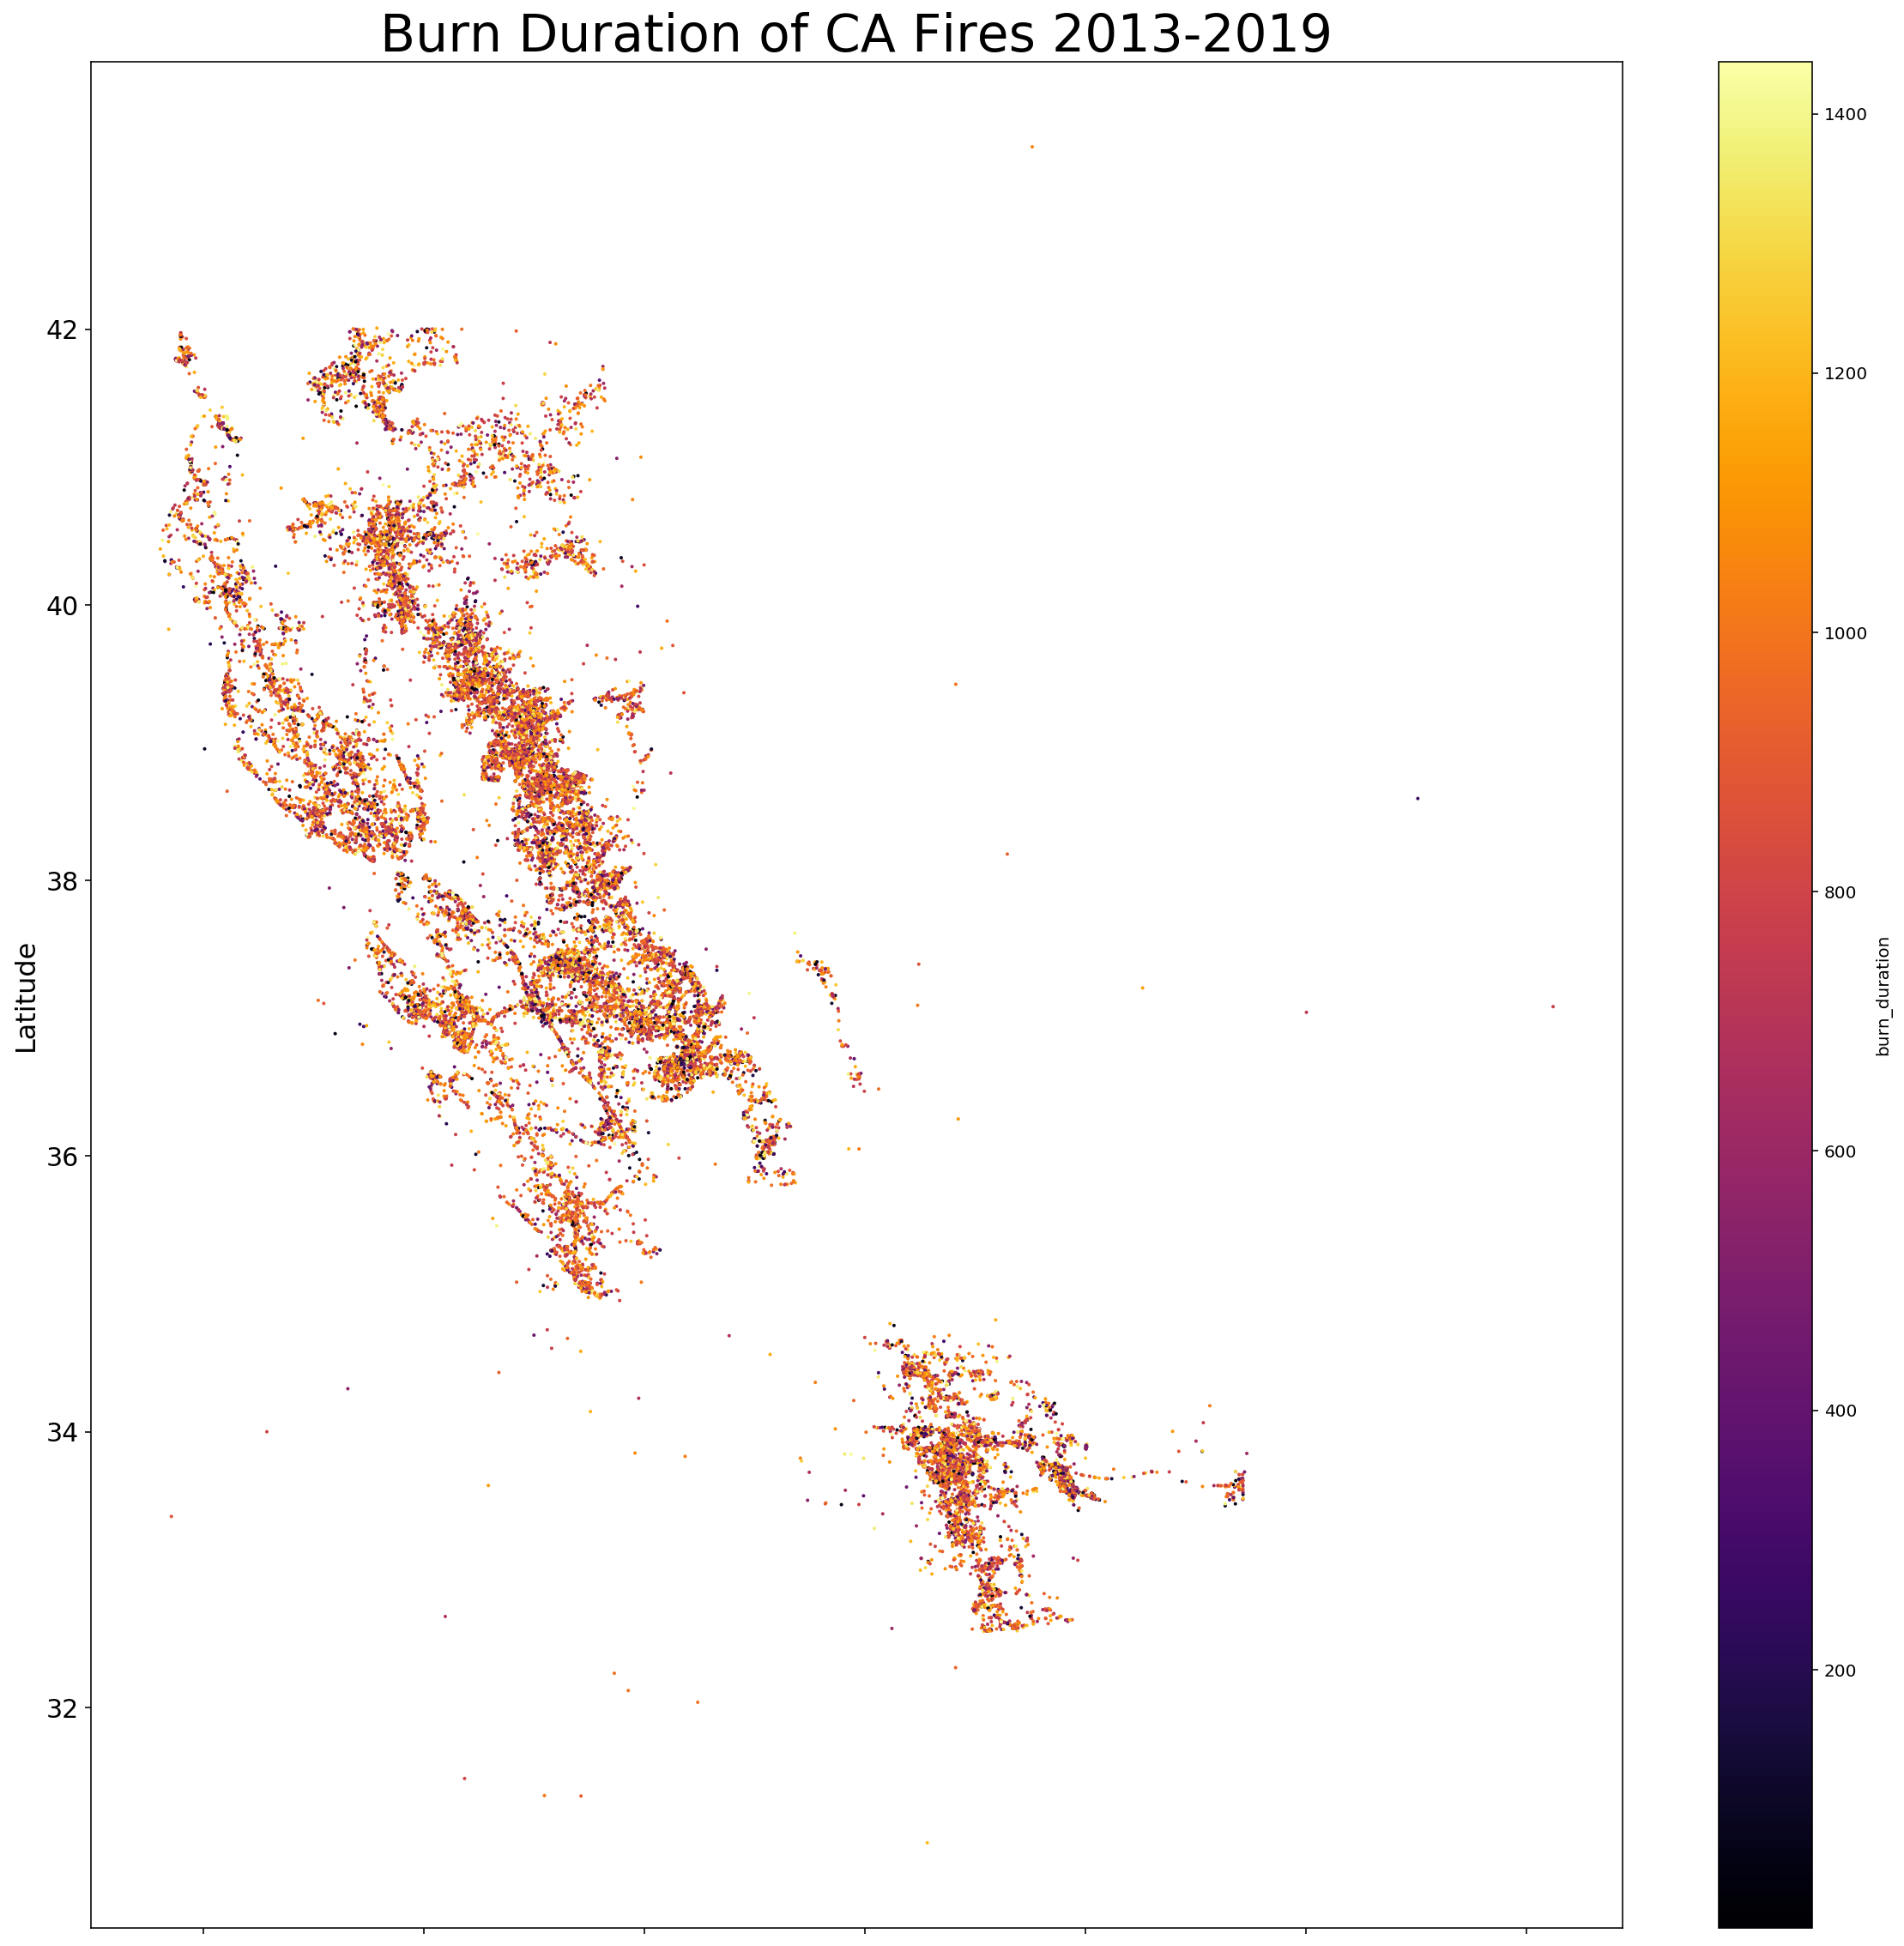

In [591]:
t = 'Burn Duration of CA Fires 2013-2019'

df.plot(kind="scatter",
        x="longitude", use_index= True,fontsize = 15,
        y="latitude",
        c="burn_duration", 
         cmap="inferno",
        
        legend = False,
        figsize=(20, 20), s=1);
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize = 16)
# plt.clabel('Burn Time in Minutes')
plt.title(t, fontsize=30);
# plt.xticks(list(range(df['longitude'])), df['longitude'].index, fontsize=12)

In [592]:
df.shape

(31777, 1404)

In [593]:
# df = df.loc[df['total_acres_burned']<.5]

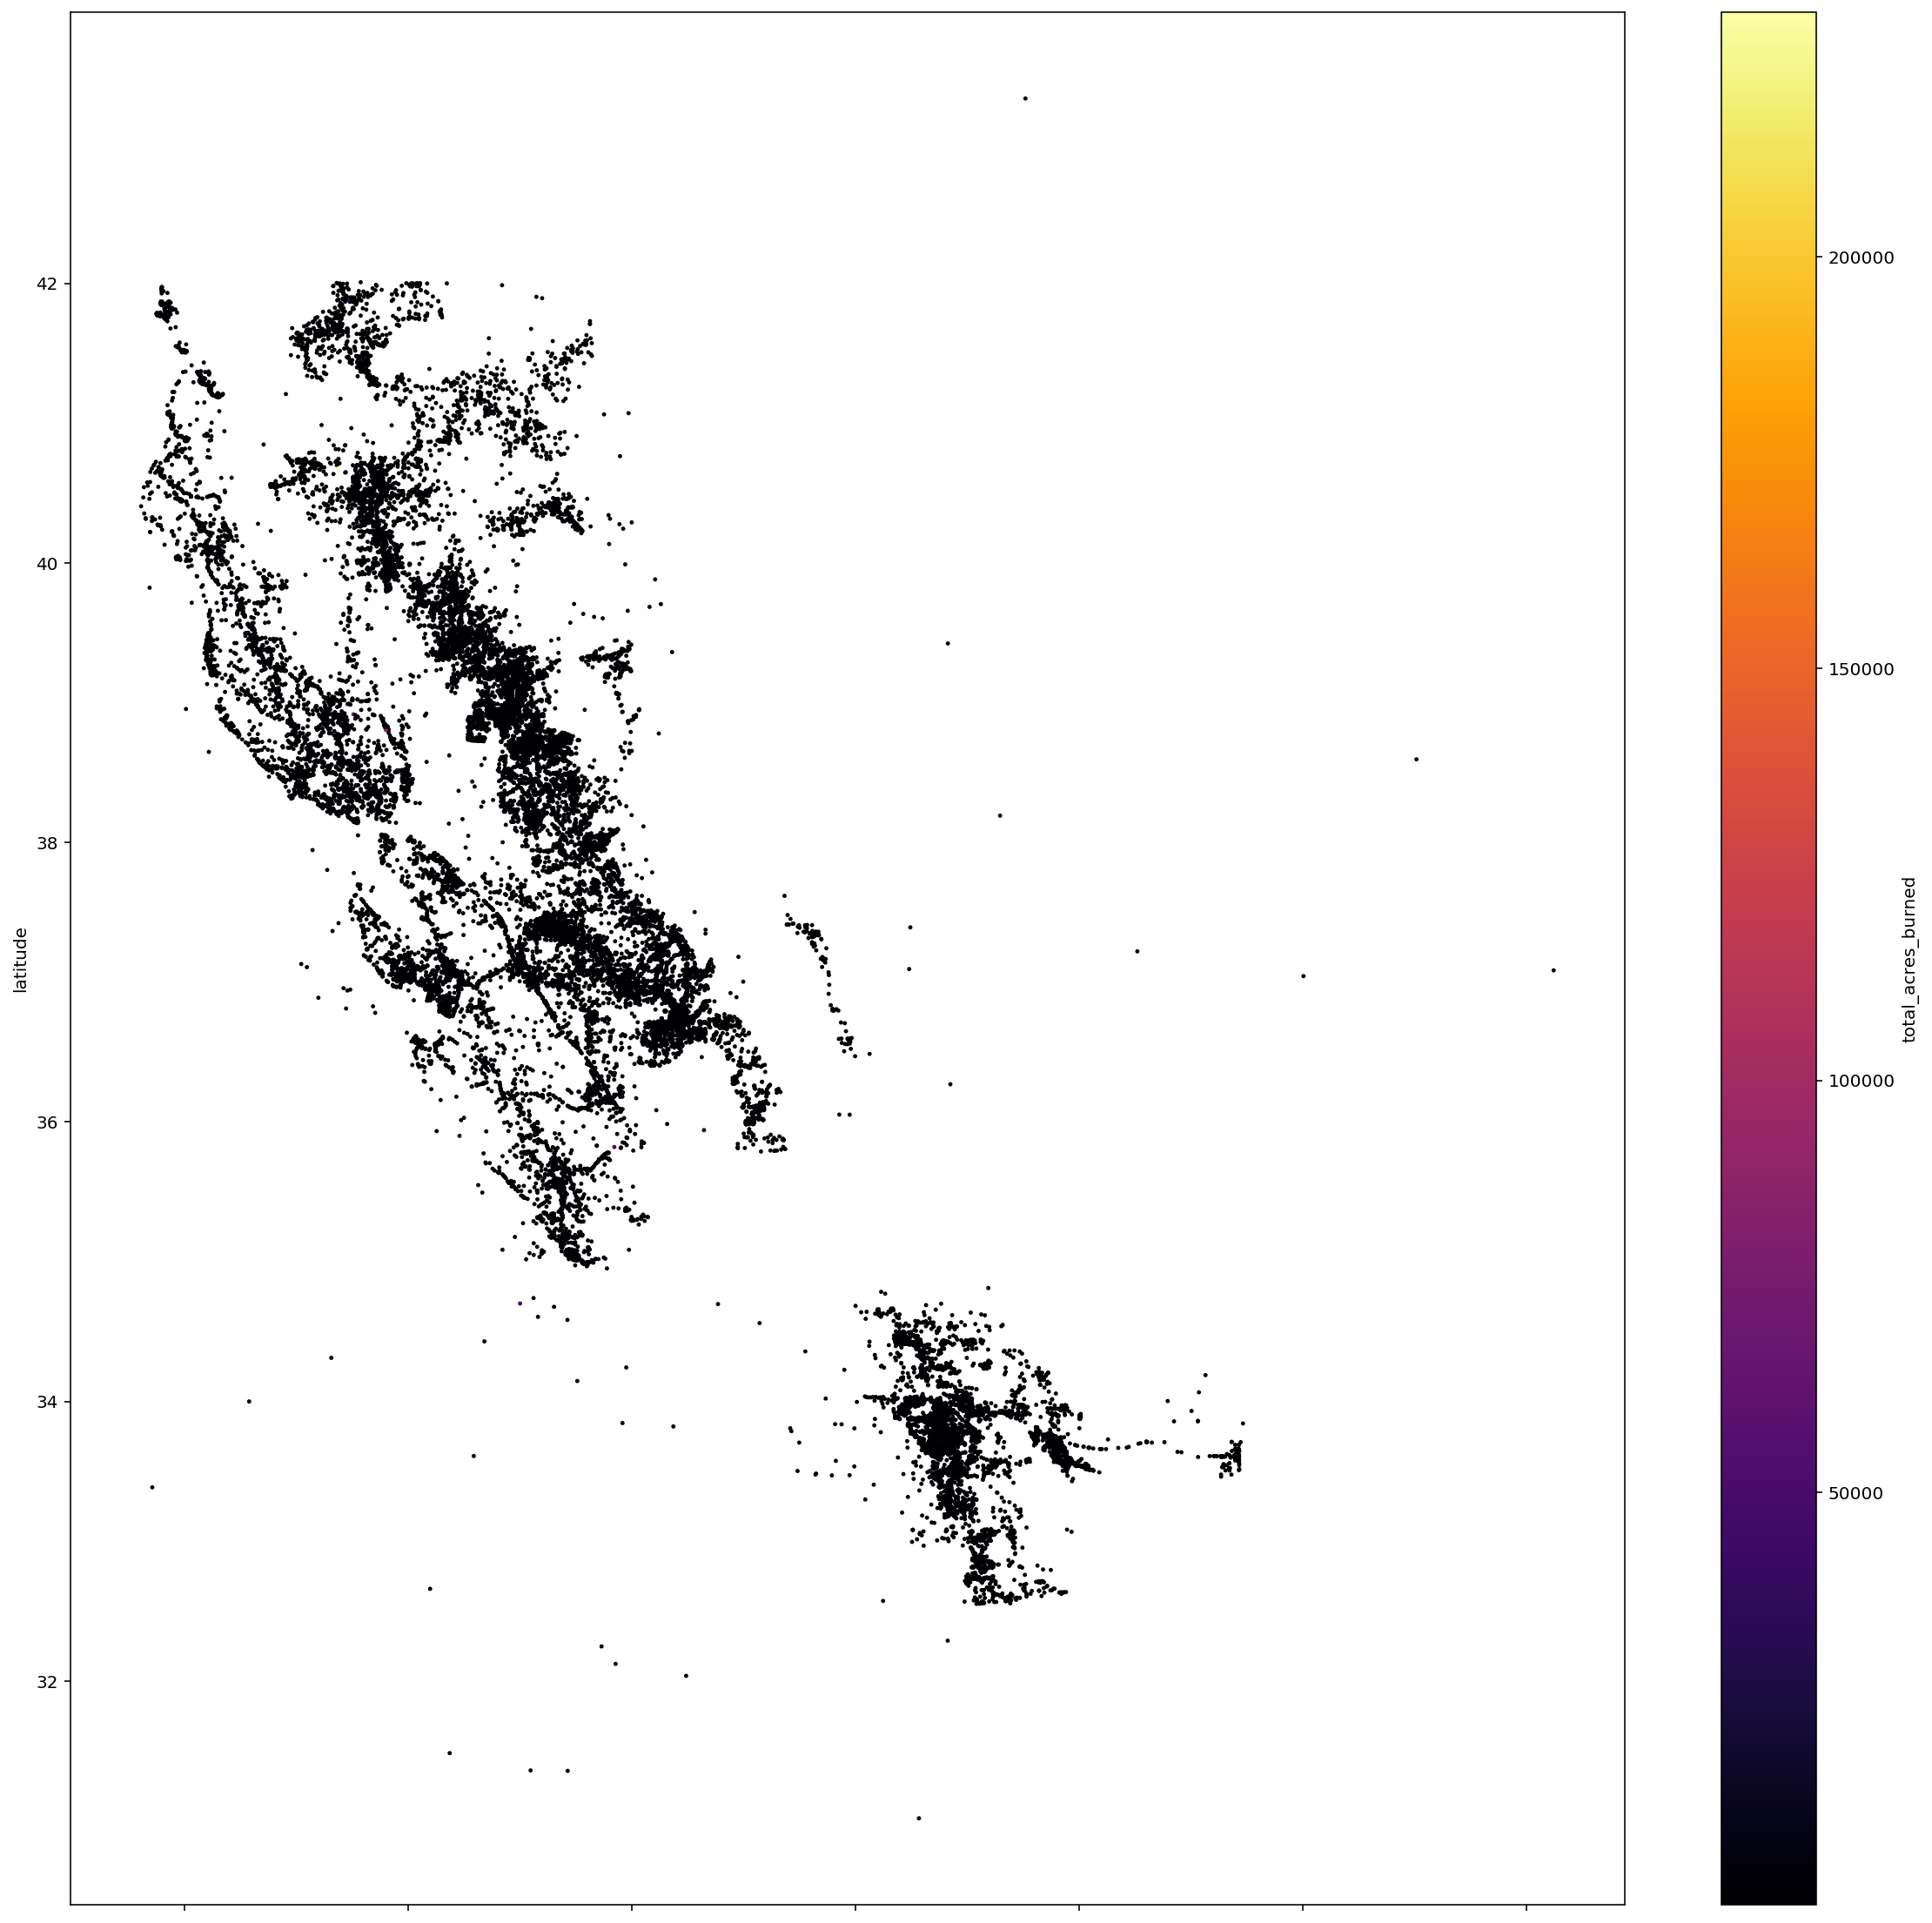

In [594]:
df.plot(kind="scatter", x="longitude", y="latitude", c="total_acres_burned",
         cmap="inferno",  figsize=(20, 20), s=2);

In [595]:
df.type_descriptions.value_counts()

    Grass fire, includes fire confined to area    14794
    Brush, or brush and grass mixture fire         7183
    Natural vegetation fire, other                 4447
    Forest, woods, or wildland fire                4109
    Unauthorized burning                            760
    Cultivated trees or nursery stock fire          131
    Cultivated vegetation, crop fire, other         127
    Cultivated grain or crop fire                   119
    Cultivated orchard or vineyard fire             107
Name: type_descriptions, dtype: int64

In [613]:
# df.plot(kind="scatter", x="longitude", y="latitude", c="",
#          cmap="inferno",  figsize=(20, 20), s=2);

In [600]:
string_columns = ['fire_department_name', 'incident_name','incident_number',
                  'county', 'street_address',
                  'city', 'state', 'zip',
                  'burn_duration', 'cause', 'incident_number',
                 'type_descriptions', 'cross_streets_or_directions_or_national_grid',
                 'containment_date']

In [601]:
X = df.drop(columns= string_columns)
y = df.burn_duration

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.5
)

In [603]:
lat_long = ['latitude', 'longitude']
X_test_lat_long = X_test[lat_long]
X_train_lat_long = X_train[lat_long]

In [605]:
X_test.drop(columns=lat_long, inplace=True)
X_train.drop(columns=lat_long, inplace=True)

/Users/peterplass/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [607]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit(X_test)

In [608]:
X_train_sc_ll = X_train_sc.join(X_train_lat_long, axis=1)
X_test_sc_ll = X_test_sc.join(X_test_lat_long, axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'join'

In [609]:
type(X_test_sc)

sklearn.preprocessing._data.StandardScaler

In [559]:
model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [565]:
X_train_sc.shape

(15888, 1391)

In [566]:
print(model.score(X_train_sc, y_train))
print(model.score(X_test_sc, y_test))

-0.007155393285409817


ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler(copy=True, with_mean=True, with_std=True).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [567]:
df.type_descriptions.value_counts()

    Grass fire, includes fire confined to area    14794
    Brush, or brush and grass mixture fire         7183
    Natural vegetation fire, other                 4447
    Forest, woods, or wildland fire                4109
    Unauthorized burning                            760
    Cultivated trees or nursery stock fire          131
    Cultivated vegetation, crop fire, other         127
    Cultivated grain or crop fire                   119
    Cultivated orchard or vineyard fire             107
Name: type_descriptions, dtype: int64

In [440]:
geo = pd.get_dummies(df[['longitude', 'latitude', "type_descriptions"]])
geo.head()

,longitude,latitude,"type_descriptions_ Brush, or brush and grass mixture fire",type_descriptions_ Cultivated grain or crop fire,type_descriptions_ Cultivated orchard or vineyard fire,type_descriptions_ Cultivated trees or nursery stock fire,"type_descriptions_ Cultivated vegetation, crop fire, other","type_descriptions_ Forest, woods, or wildland fire","type_descriptions_ Grass fire, includes fire confined to area","type_descriptions_ Natural vegetation fire, other",type_descriptions_ Unauthorized burning
start_date,,,,,,,,,,,
2013-01-01 00:00:00,-117.286983,33.840233,0,0,0,0,0,0,0,0,1
2013-01-01 00:00:00,-116.127000,33.964933,1,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,-117.523467,34.446983,0,0,0,0,0,0,0,1,0
2013-01-05 00:00:00,-119.353167,37.043217,0,0,0,0,0,0,0,1,0
2013-01-05 00:00:00,-117.252050,33.589333,0,0,0,0,0,0,1,0,0


In [438]:
df.shape

(31777, 1404)

In [437]:
df.cause.value_counts()

MISCELLANEOUS        14087
DEBRIS BURNING        3848
ELECTRICAL POWER      2333
EQUIPMENT USE         2134
ARSON                 2054
Undetermined          1098
CAMPFIRE              1053
LIGHTNING              819
Debris Burning         668
SMOKING                592
Vehicle                543
Arson                  522
Equipment              495
Miscellaneous          424
Electrical Power       383
Campfire               216
Lightning              161
Playing with Fire      142
Smoking                 92
CHILDREN                68
RAILROAD                34
Railroad                 9
Exposure                 2
Name: cause, dtype: int64

In [436]:
df.type_descriptions.value_counts()

    Grass fire, includes fire confined to area    14794
    Brush, or brush and grass mixture fire         7183
    Natural vegetation fire, other                 4447
    Forest, woods, or wildland fire                4109
    Unauthorized burning                            760
    Cultivated trees or nursery stock fire          131
    Cultivated vegetation, crop fire, other         127
    Cultivated grain or crop fire                   119
    Cultivated orchard or vineyard fire             107
Name: type_descriptions, dtype: int64

In [349]:
# pipe = Pipeline([
#     ('sc', StandardScaler()),
#     ('pc', PCA()),
#     ('lr', LogisticRegression(penalty='none', solver='lbfgs', random_state=42)),
    
# ])

In [348]:
# pipe.get_params()

In [312]:
# kf = KFold(n_splits=5, shuffle=True, random_state=17)

In [430]:
# gs.best_params_

In [441]:
db_model = DBSCAN(eps = .02, min_samples=4)
db_model.fit(geo)

DBSCAN(algorithm='auto', eps=0.02, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [442]:
# db_model.fit(X_train, y_train)

In [443]:
df.head()

,fire_department_name,incident_number,exposure_number,incident_name,year,containment_date,county,street_address,city,state,...,Sonoma_y,Stanislaus_y,Sutter_y,Tehama_y,Trinity_y,Tulare_y,Tuolumne_y,Ventura_y,Yolo_y,Yuba_y
start_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,RIVERSIDE CFD,16,0,CASTLEROCK TRL MEAD,2013,2013-01-01 00:27:00,Riverside,00019275 CASTLEROCK TRL,MEAD,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 00:00:00,RIVERSIDE CFD,312,0,DATE PALM,2013,2013-01-01 19:03:00,Riverside,00065150 DATE PALM ST,MECC,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,CDF-SAN BERNARDINO,194,0,LA MIRADA RD PHELAN,2013,2013-01-05 19:27:00,San Bernardino,00010820 LA MIRADA RD,PHELAN,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,CDF-FRESNO,215,0,AUBERRY RD / ALDER HEIGHT,2013,2013-01-05 16:55:00,Fresno,00036709 PETERSON RD,Tollhouse,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,WILDOMAR FIRE DEPARTMENT,1752,0,PALOMAR,2013,2013-01-05 12:59:00,Riverside,00022800 PALOMAR ST,WILD,CA,...,0,0,0,0,0,0,0,0,0,0


## Pipeline

In [418]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pc', PCA()),
    ('rf', RandomForestRegressor()),
    
])

In [419]:
rf = RandomForestRegressor()

In [420]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [422]:
pgrid = {
    'pc__n_components':np.arange(1, 201, 10),
    'rf__min_samples_split' :[2,3,4],
    'rf__n_estimators':[100],
    'rf__min_samples_leaf':[1]

}

gs = GridSearchCV(pipe, pgrid, cv=rf, scoring='r2', return_train_score=False, n_jobs=2)

gs.fit(X_train, y_train)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [423]:
grid = GridSearchCV(pipe, param_grid=parameteres, cv=5)

NameError: name 'parameteres' is not defined

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators':[100,125],
    "max_depth" : [None, 4, 5, 6],
    'max_features' : [None, #bagging
                     'auto'] #random forest
    
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_) # cross val score
gs.best_params_

## /Pipeline

In [398]:
# km = KMeans(n_clusters=1000)
# km.fit(geo)

In [473]:
# def db_search(eps_range, sample_range, df):
#     n=0
#     eps_list = []
#     sample_size_list = [] 
#     num_clust_list = []
#     for eps_value in eps_range:
#         for sample_size in sample_range:
#             model = DBSCAN(eps = eps_value, min_samples = sample_size)
#             model.fit(df)
#             num_clusters = len(set(model.labels_))
#             n+=1
#             eps_list.append(eps_value)
#             sample_size_list.append(sample_size)
#             num_clust_list.append(num_clusters)
            
#         if n%10 == 0:
#             print("10 complete")
            
#     db_search_df = pd.DataFrame({
#         'eps': eps_list,
#         'sample_size': sample_size_list,
#         'number_o_clusters': num_clust_list
        
#     })
#     return db_search_df

In [492]:
# eps_range_ex = list(np.linspace(0.2,4, 40))
# sample_range = list(range(1,11))

In [479]:
#eps_range_ex

In [474]:
# db_search_df_sample = db_search(list(np.linspace(0.1,1, 10)), [1], geo)

10 complete


In [476]:
# db_search_df_sample

,eps,sample_size,number_o_clusters
0,0.1,1,1193
1,0.2,1,383
2,0.3,1,207
3,0.4,1,140
4,0.5,1,109
5,0.6,1,88
6,0.7,1,72
7,0.8,1,59
8,0.9,1,48
9,1.0,1,42


In [485]:
# db_search_df_2 = db_search(list(np.linspace(0.01,.2, 10)), sample_range, geo)
# db_search_df_2

10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete


,eps,sample_size,number_o_clusters
0,0.01,1,17710
1,0.01,2,4336
2,0.01,3,2065
3,0.01,4,1152
4,0.01,5,739
...,...,...,...
95,0.20,6,71
96,0.20,7,63
97,0.20,8,60
98,0.20,9,57


In [538]:
db_model = DBSCAN(eps = .1, min_samples=5)
db_model.fit(geo)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

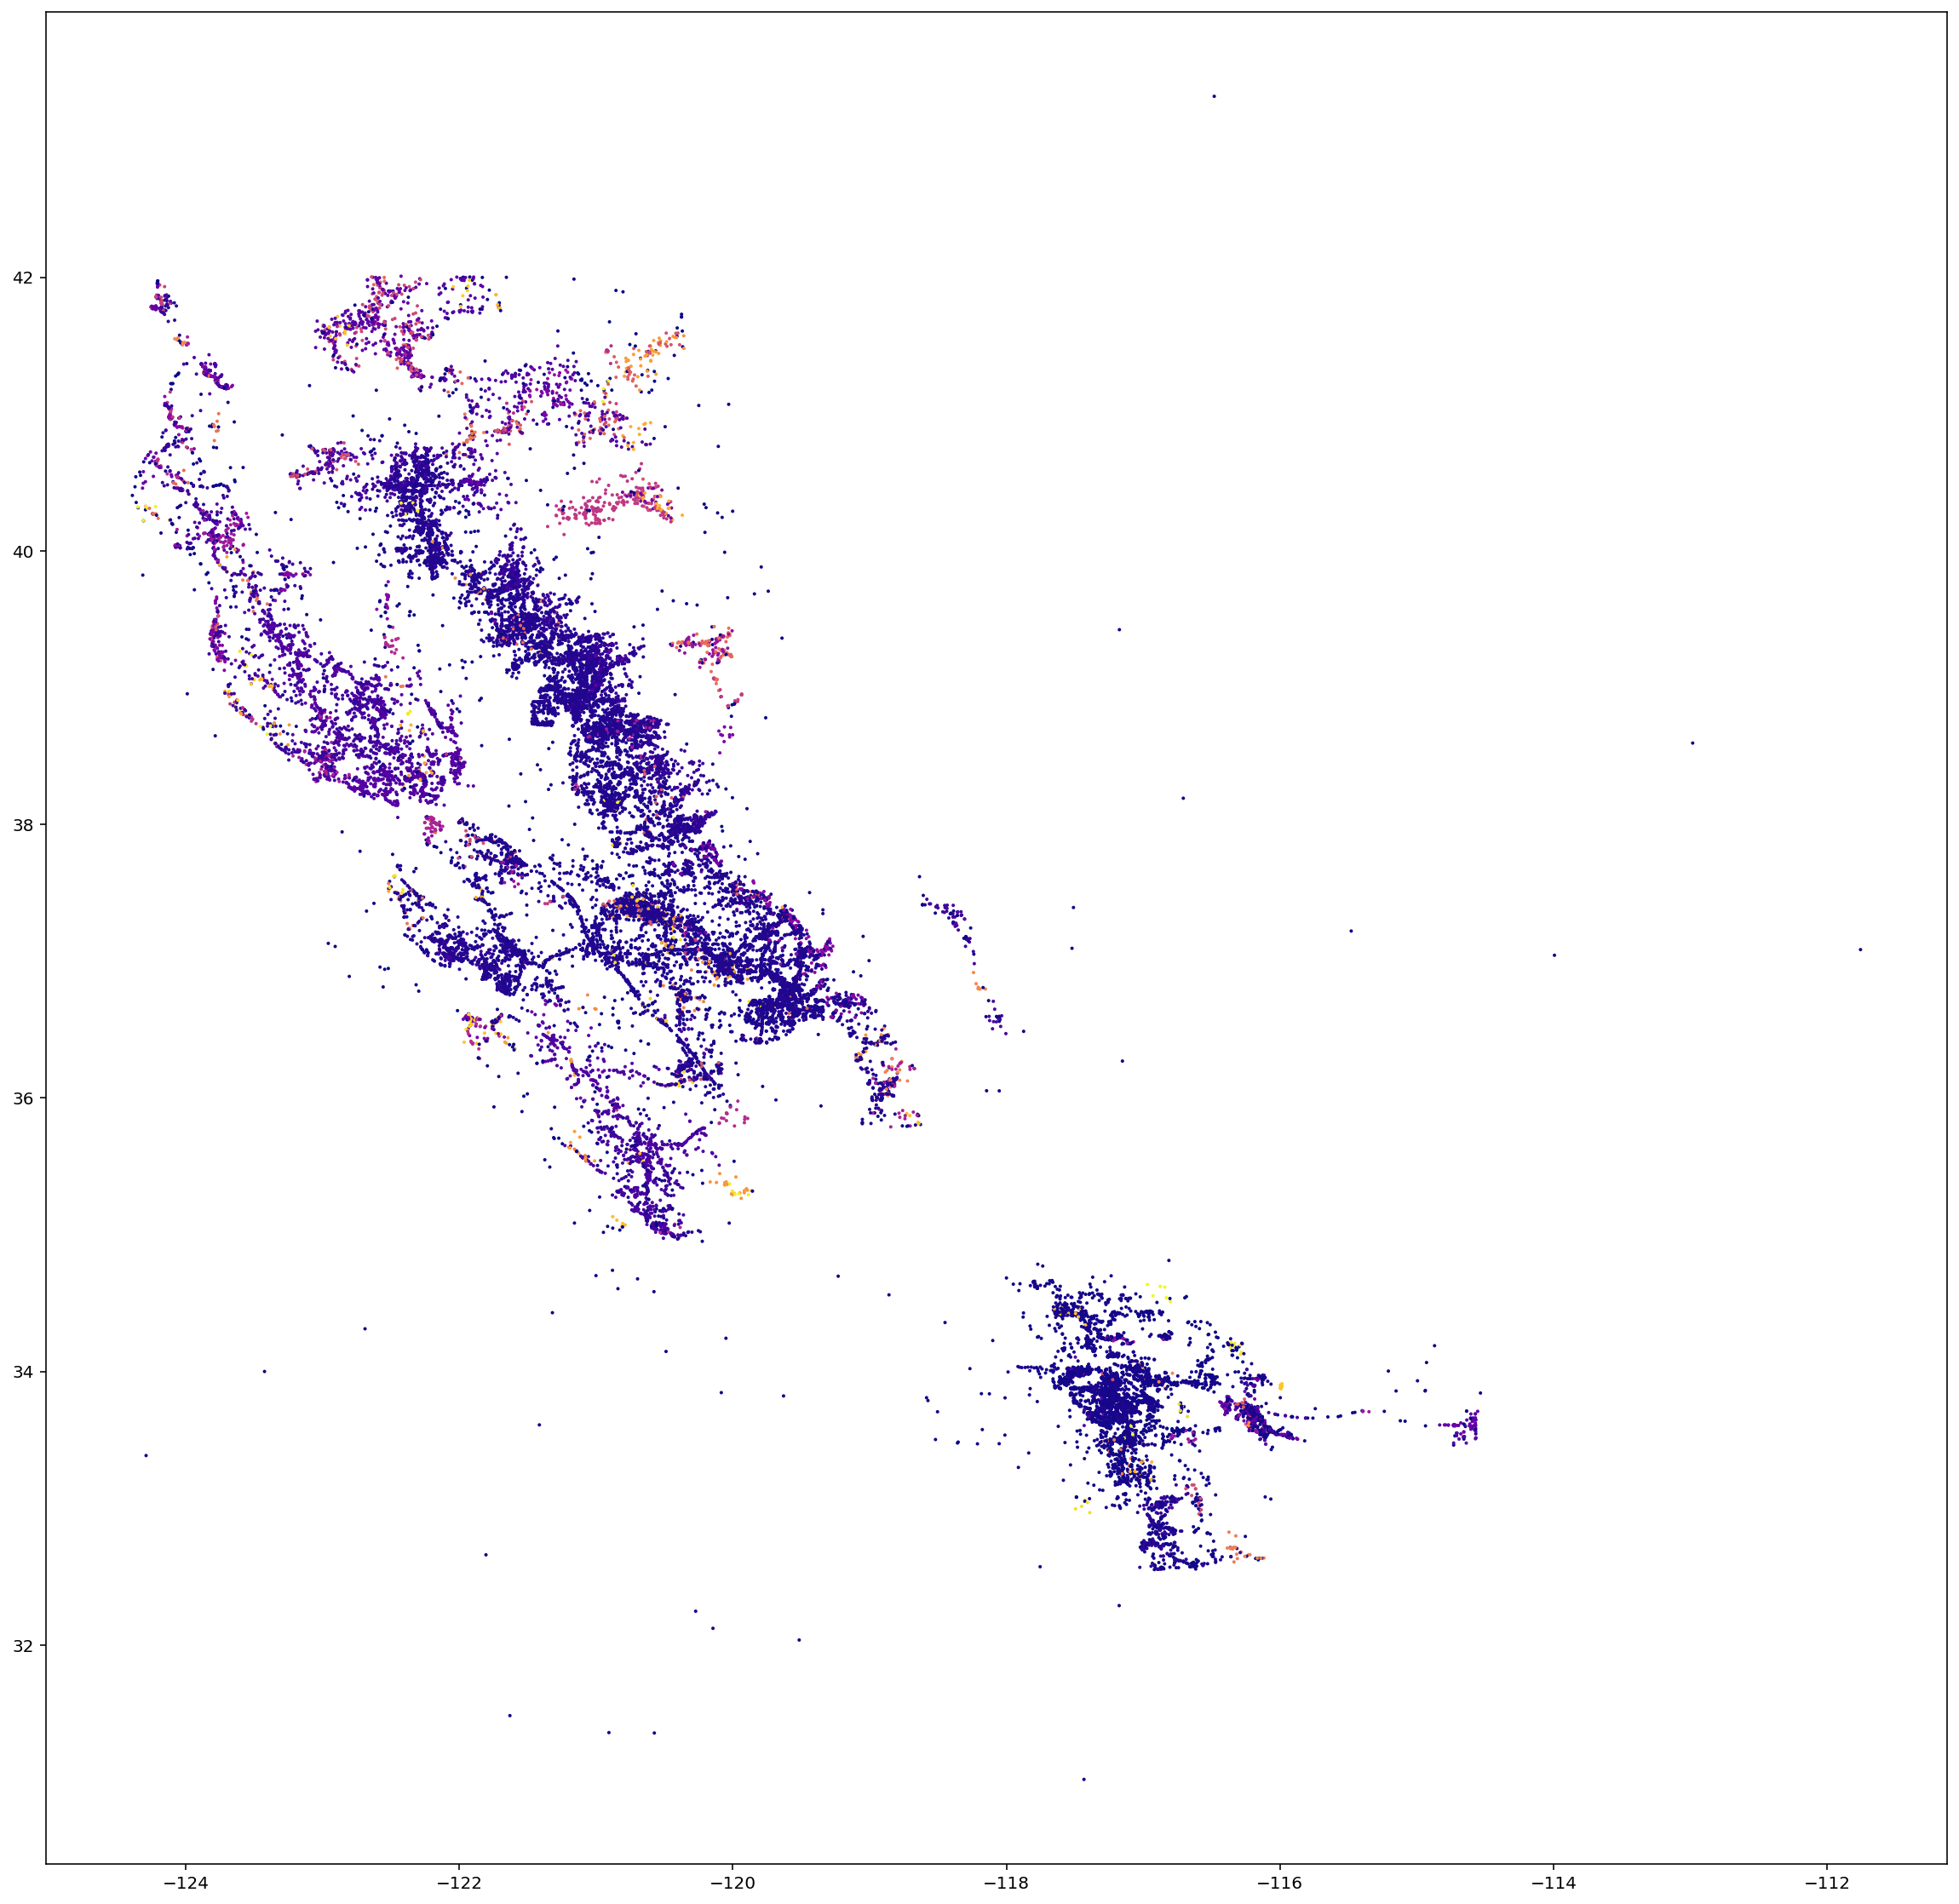

In [539]:
plt.figure(figsize=(20, 20))
plt.scatter(df['longitude'], df['latitude'], c=db_model.labels_, s=1, cmap="plasma");

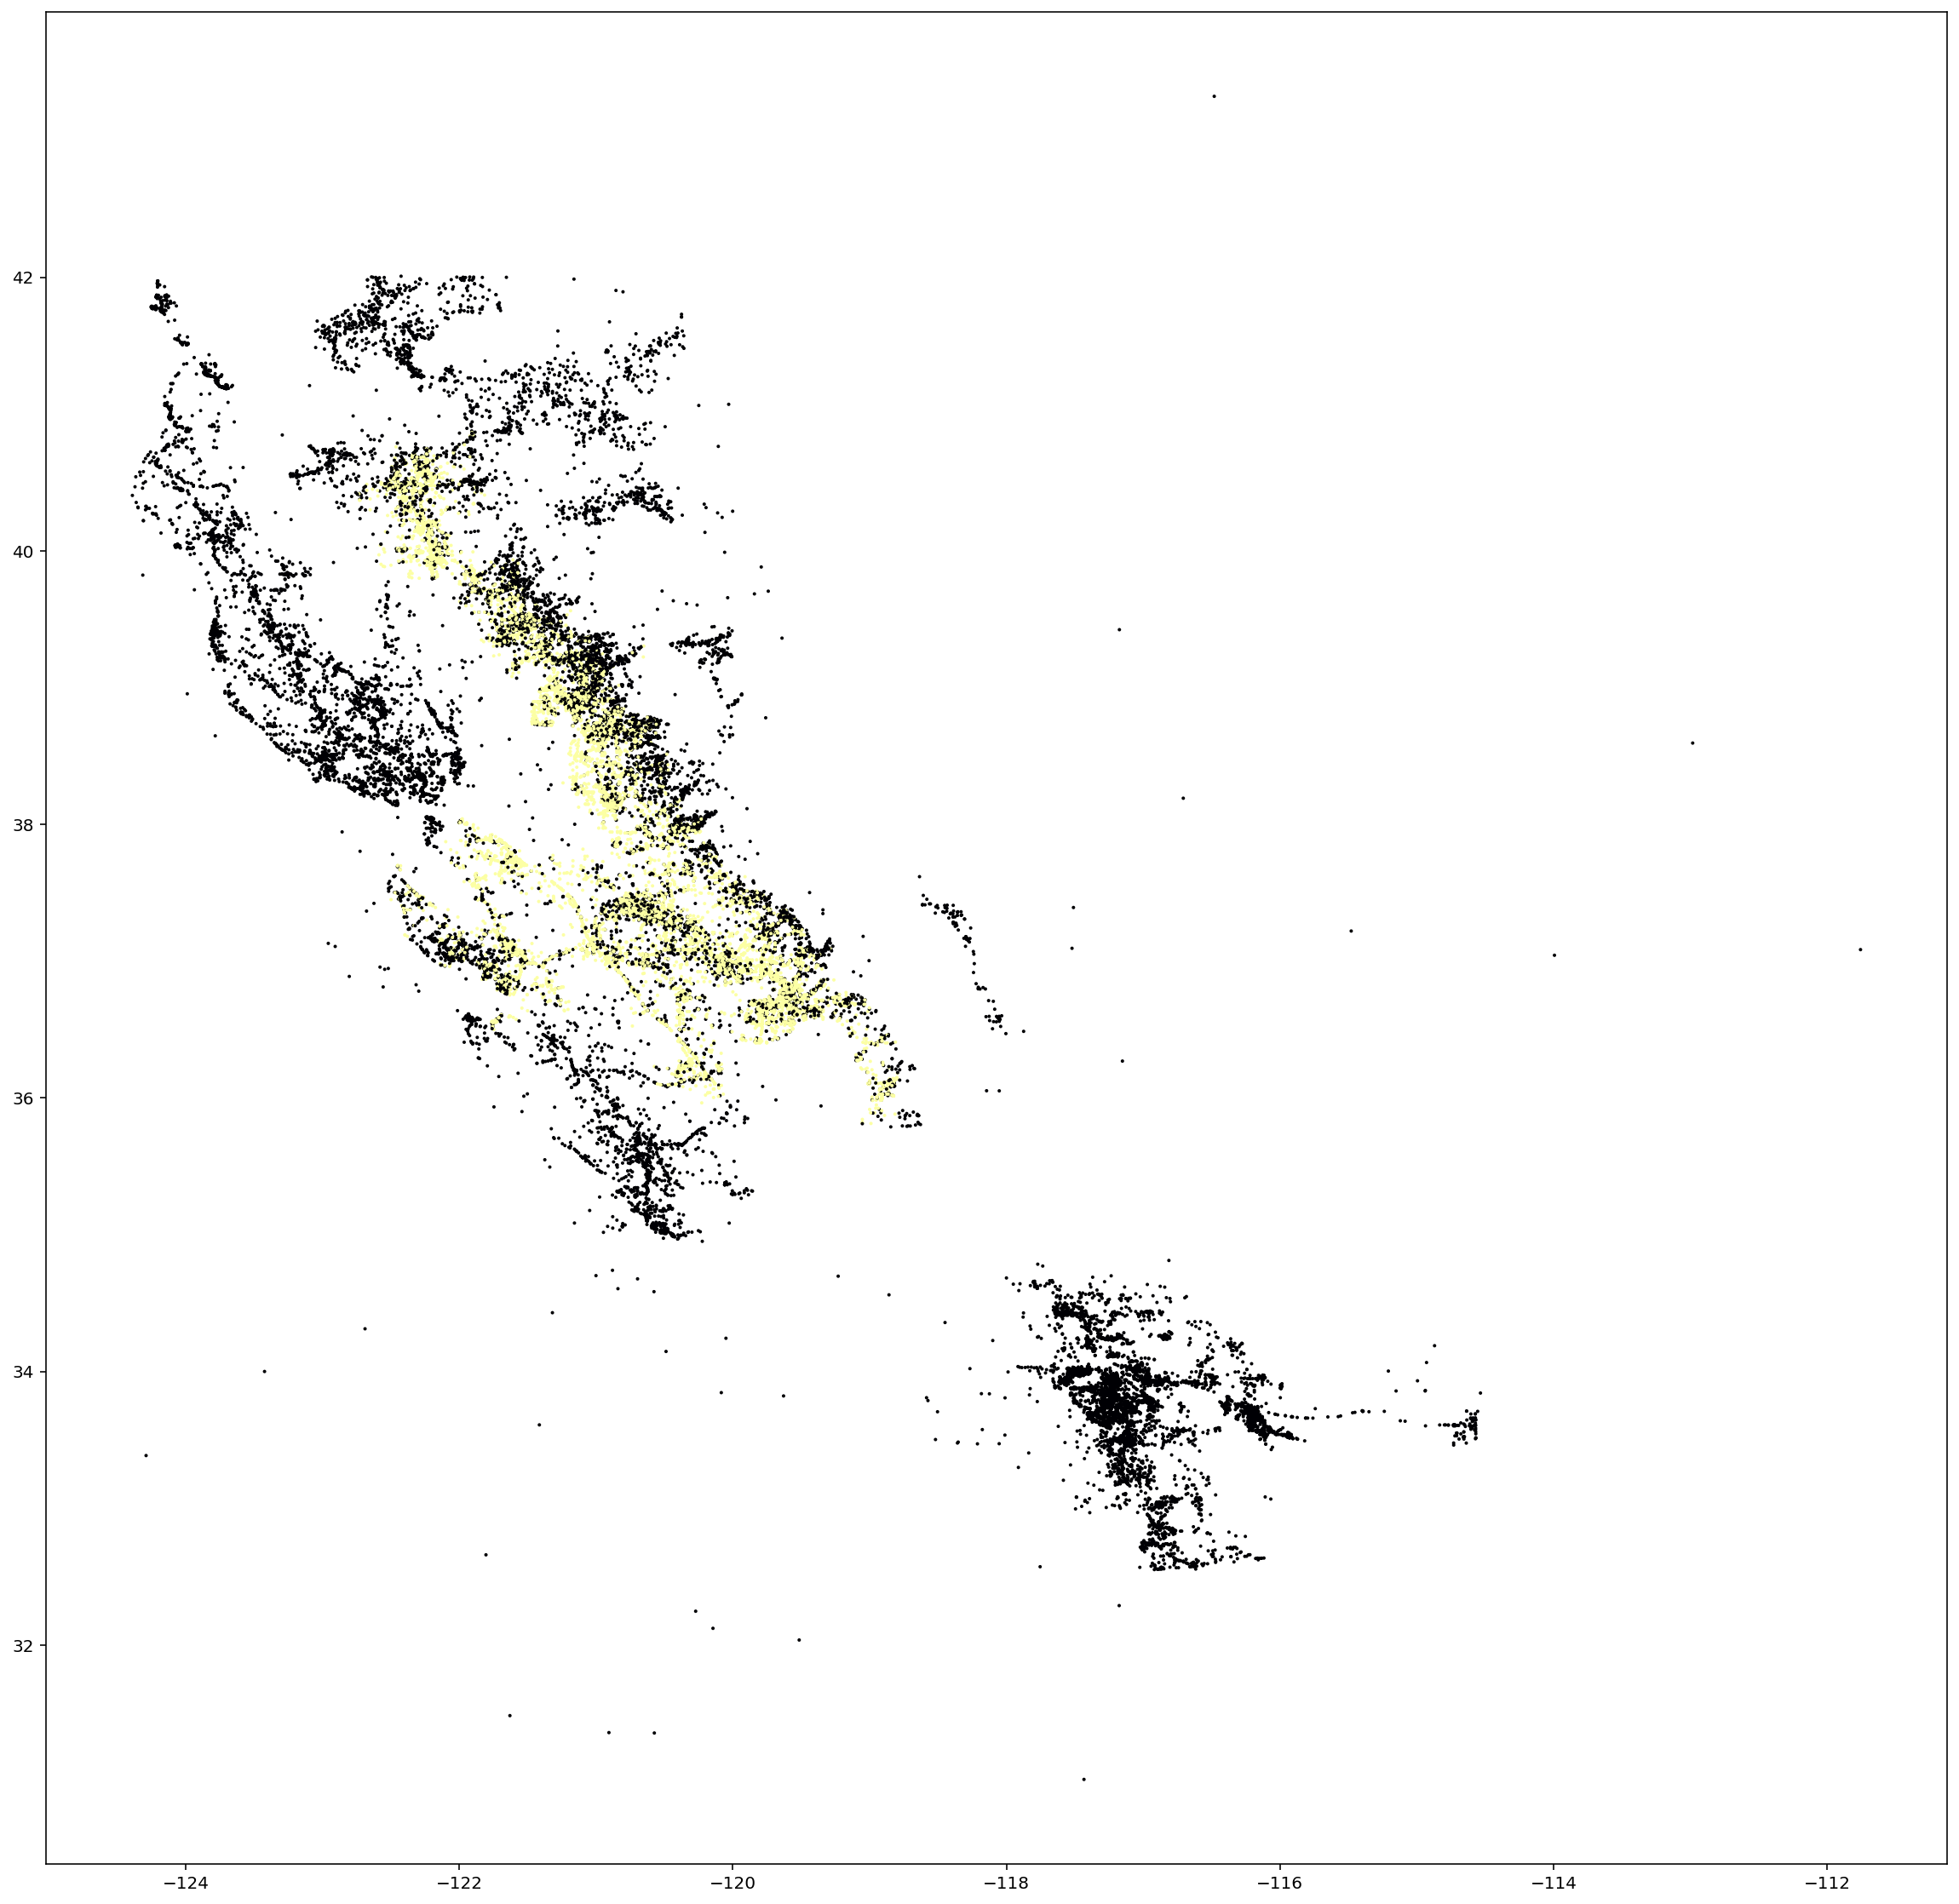

In [543]:
plt.figure(figsize=(20, 20))
plt.scatter(df['longitude'], df['latitude'], c=db_model.labels_==7, s=1, cmap="inferno");

In [544]:
len(set(db_model.labels_))

234

In [541]:
pd.DataFrame(db_model.labels_)[0].value_counts()

 7      10091
 6       2764
 1       2132
 4       1793
-1       1651
        ...  
 225        5
 168        5
 200        5
 195        5
 223        5
Name: 0, Length: 234, dtype: int64

In [545]:
X['cluster'] = db_model.labels_
X = pd.get_dummies(columns=['cluster'], data=X, drop_first=True)

In [546]:
# X['cluster'] = km.labels_
# X = pd.get_dummies(columns=['cluster'], data=X, drop_first=True)


In [547]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.5, shuffle = False
)

In [550]:
model20 = RandomForestRegressor()
model20.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [551]:
print(model20.score(X_train, y_train))
print(model20.score(X_test, y_test))

0.8441822241747107
-0.10648736739134734


In [554]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [555]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.22717972556775934
-0.2105357267730985


In [552]:
def transfer_tune(X, y, k):
    location_data = df[["longitude", "latitude"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.5
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"{k} : {r2}")

In [ ]:
for k in range(2800, 3100, 50):
    transfer_tune(X, y, k)

In [344]:
for k in range(2000, 3000, 100):
    transfer_tune(X, y, k)

2000 : -0.12147990983252079
2100 : -0.127802427442546
2200 : -4148436.5551800705
2300 : -0.162202695615715
2400 : -0.16013209693546693
2500 : -0.17494237616373343
2600 : -0.1748065618664172
2700 : -1459504.3326410225


KeyboardInterrupt: 

In [ ]:
oh = OneHotEncoder(categories="auto", sparse=False)
oh.fit(km.labels_.reshape(-1, 1))

In [ ]:
dummy_matrix = oh.transform(km.labels_.reshape(-1, 1))

In [ ]:
oh.transform(X_test)